In [11]:
# pip install yfinance

In [12]:
import yfinance as yf

In [13]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [14]:
stock = "TATAMOTORS.NS"
Tata_Motors_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TATAMOTORS.NS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


In [15]:
Tata_Motors_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [16]:
Tata_Motors_data.shape

(0, 6)

In [17]:
Tata_Motors_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
Tata_Motors_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [19]:
Tata_Motors_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of  data')

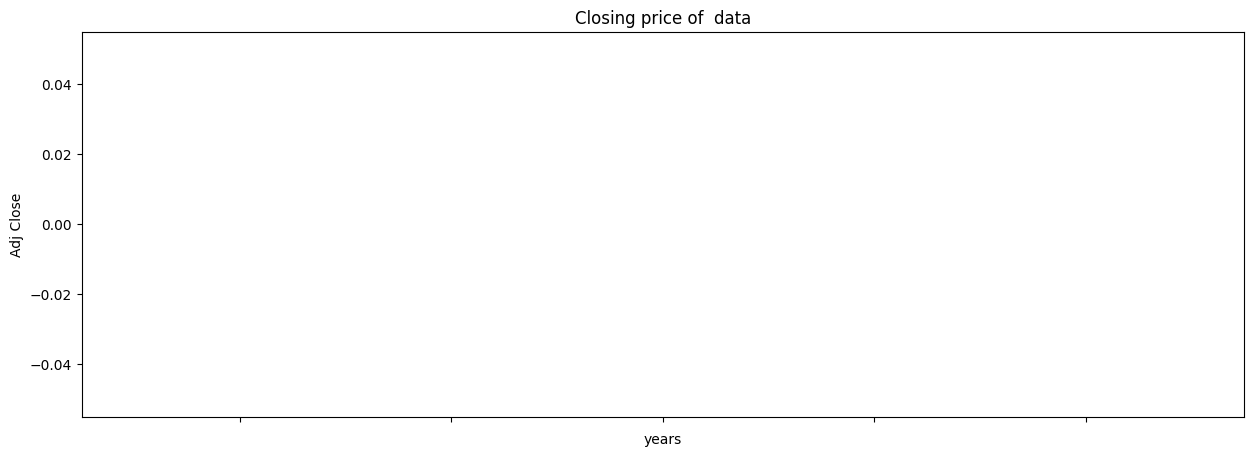

In [21]:
plt.figure(figsize = (15,5))
Tata_Motors_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of  data")

In [22]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of  data")
    

In [23]:
Tata_Motors_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

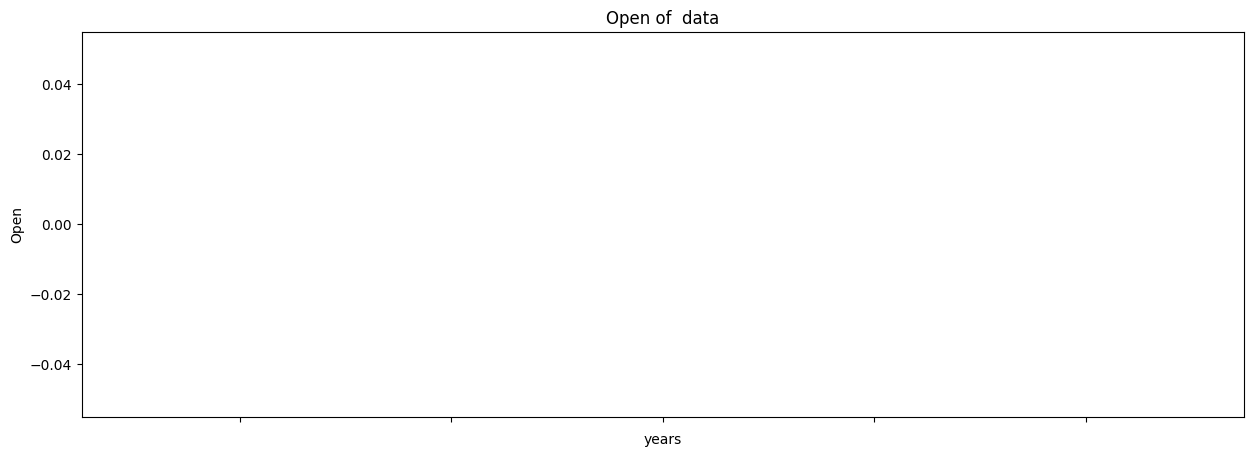

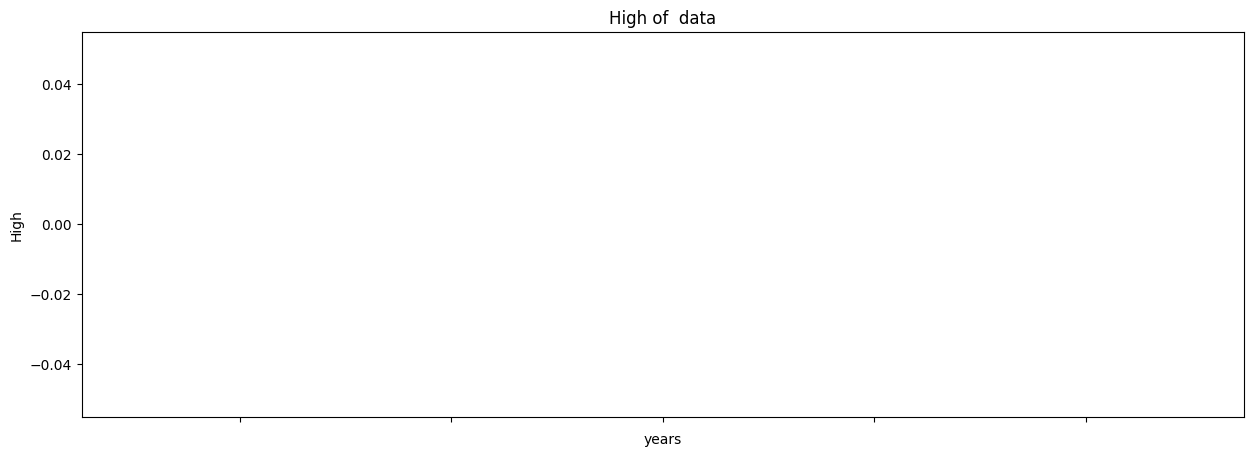

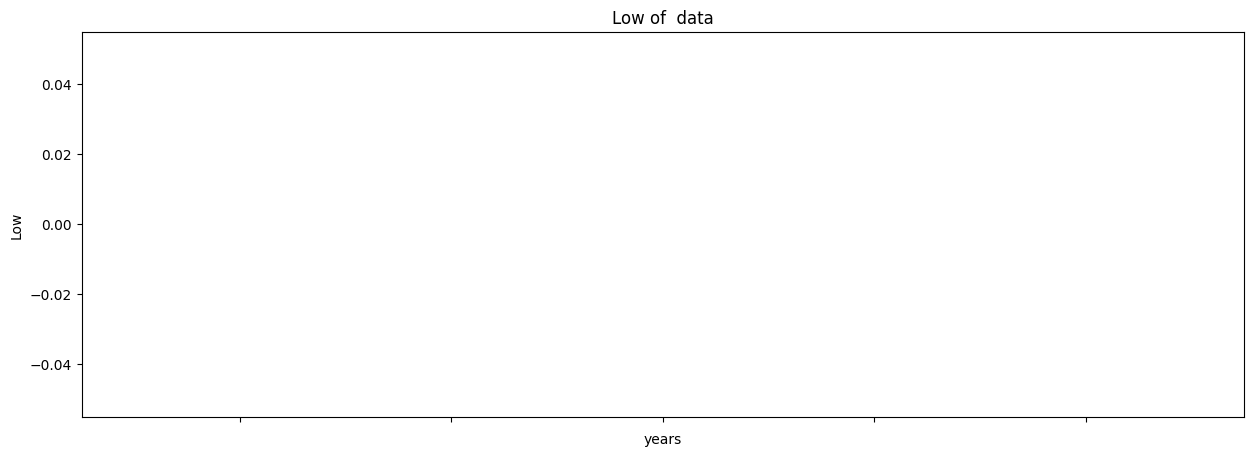

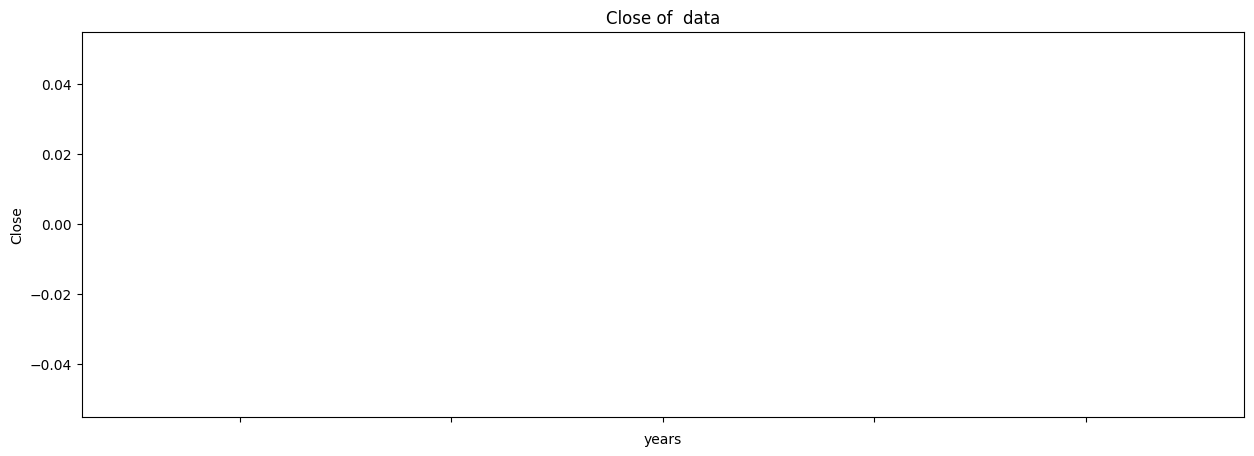

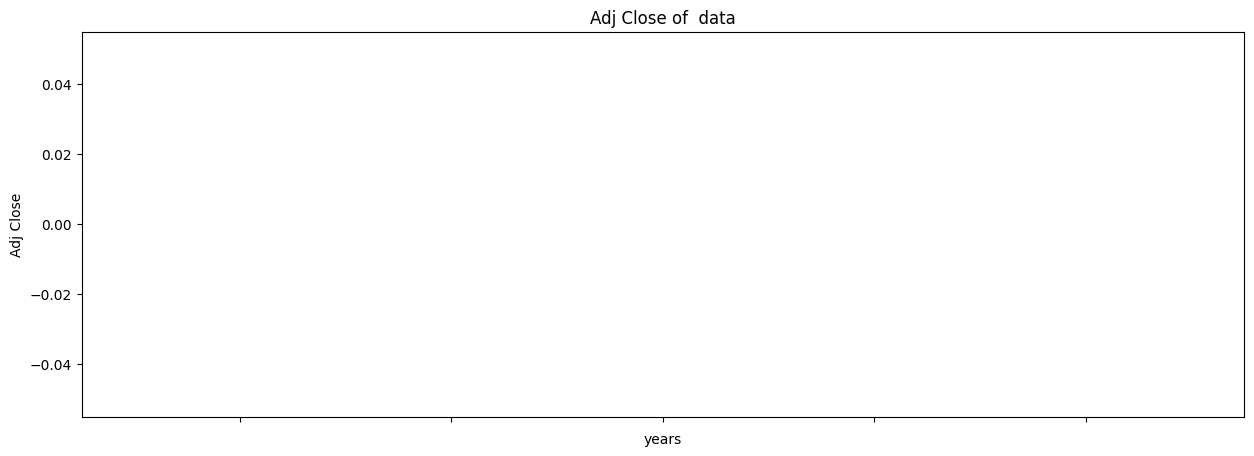

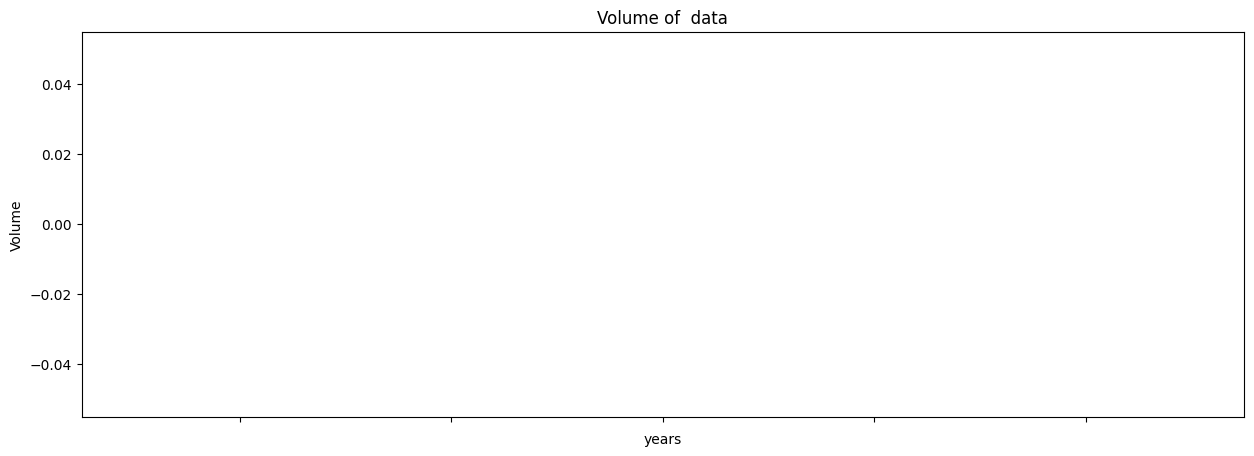

In [24]:
for column in Tata_Motors_data.columns:
    plot_graph((15,5),Tata_Motors_data[column], column)

In [25]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [26]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [27]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [28]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [29]:
for i in range(2009,2024):
    print(i,list(Tata_Motors_data.index.year).count(i))

AttributeError: 'Index' object has no attribute 'year'

In [ ]:
Tata_Motors_data['MA_for_250_days'] = Tata_Motors_data['Adj Close'].rolling(250).mean()

In [ ]:
Tata_Motors_data['MA_for_250_days'][0:250].tail()

Date
2005-08-11         NaN
2005-08-12         NaN
2005-08-15         NaN
2005-08-16         NaN
2005-08-17    5.064351
Name: MA_for_250_days, dtype: float64

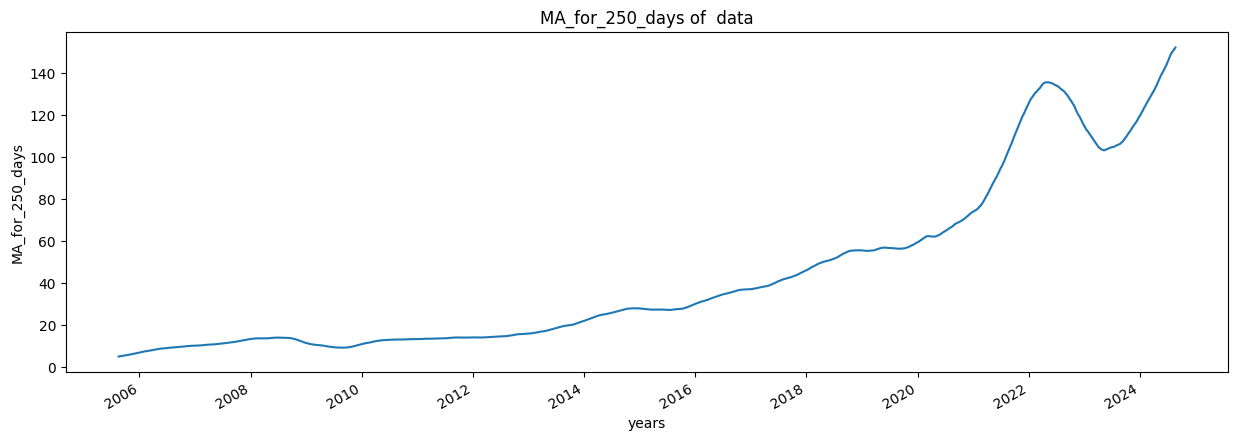

In [ ]:
plot_graph((15,5), Tata_Motors_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

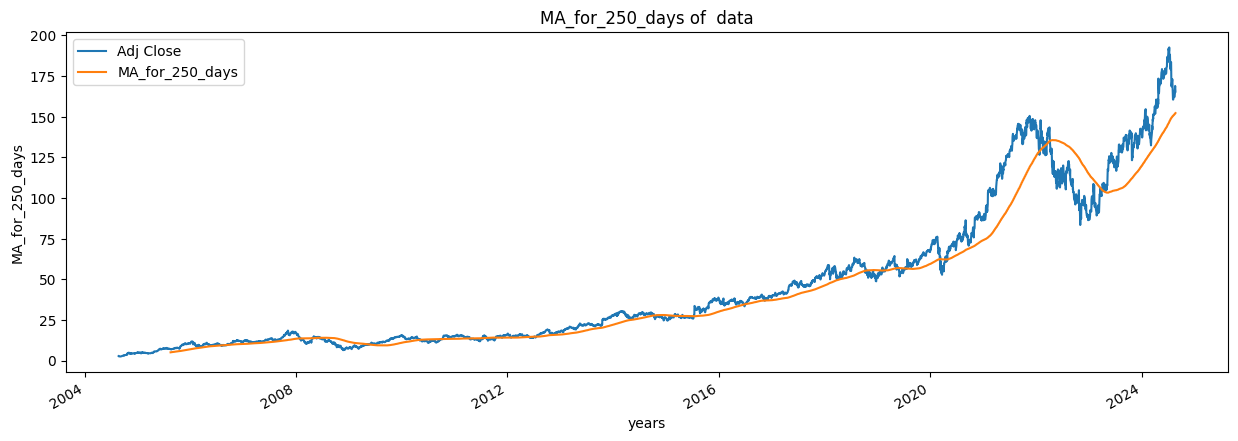

In [ ]:
plot_graph((15,5), Tata_Motors_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

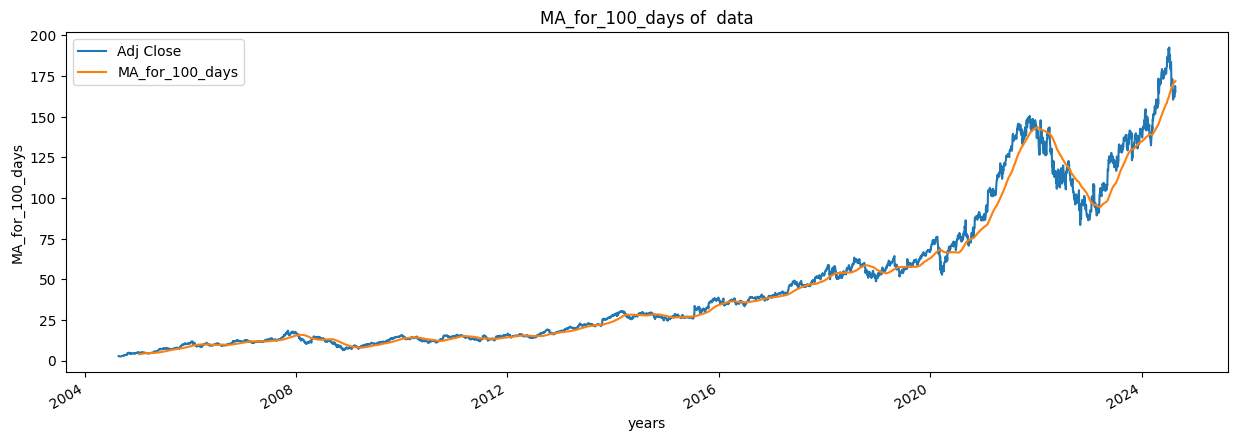

In [ ]:
Tata_Motors_data['MA_for_100_days'] = Tata_Motors_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), Tata_Motors_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

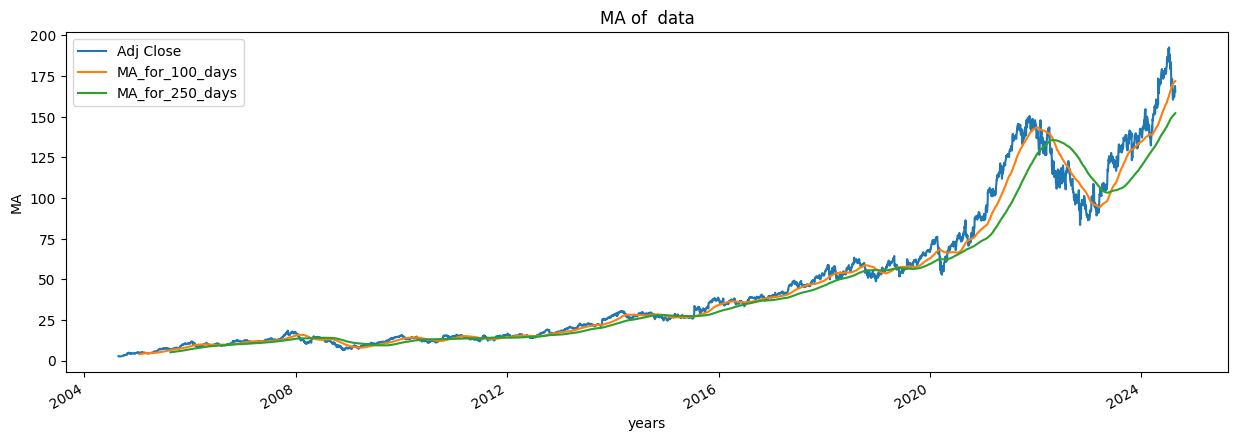

In [ ]:
plot_graph((15,5), Tata_Motors_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
Tata_Motors_data['percentage_change_cp'] = Tata_Motors_data['Adj Close'].pct_change()
Tata_Motors_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-23,2.721690,NaN
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775
2004-08-26,2.684621,0.018019
2004-08-27,2.640835,-0.016310


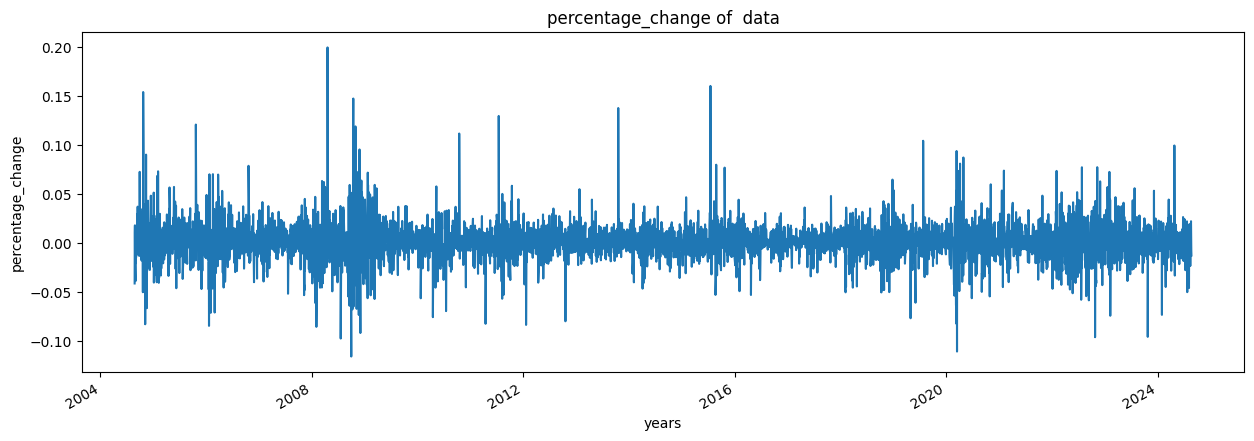

In [ ]:
plot_graph((15,5), Tata_Motors_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = Tata_Motors_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.66000366]), array([2.48808169]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.22840556e-03],
       [6.35788989e-04],
       [7.83614035e-04],
       ...,
       [8.75375940e-01],
       [8.68382259e-01],
       [8.57129287e-01]])

In [ ]:
len(scaled_data)

5035

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.34924043e-03],
        [5.49314139e-03],
        [5.7

In [ ]:

int(len(x_data)*0.7)

3454

In [ ]:
4908-100-int(len(x_data)*0.7)

1354

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\burid\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2230/3454 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 2.2369e-04

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [ ]:
predictions

array([[0.2953434 ],
       [0.2960982 ],
       [0.29310575],
       ...,
       [0.8009634 ],
       [0.80835193],
       [0.8092106 ]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.654106],
       [ 58.79765 ],
       [ 58.22857 ],
       ...,
       [154.80884 ],
       [156.21393 ],
       [156.37721 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.07913208],
       [ 58.34310913],
       [ 57.80172348],
       ...,
       [168.96000671],
       [167.63000488],
       [165.49000549]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

6.188739558273525

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = Tata_Motors_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-03,60.079132,58.654106
2018-10-04,58.343109,58.797649
2018-10-05,57.801723,58.228569
2018-10-08,57.383202,57.537895
2018-10-09,56.876278,56.953041


<Figure size 640x480 with 0 Axes>

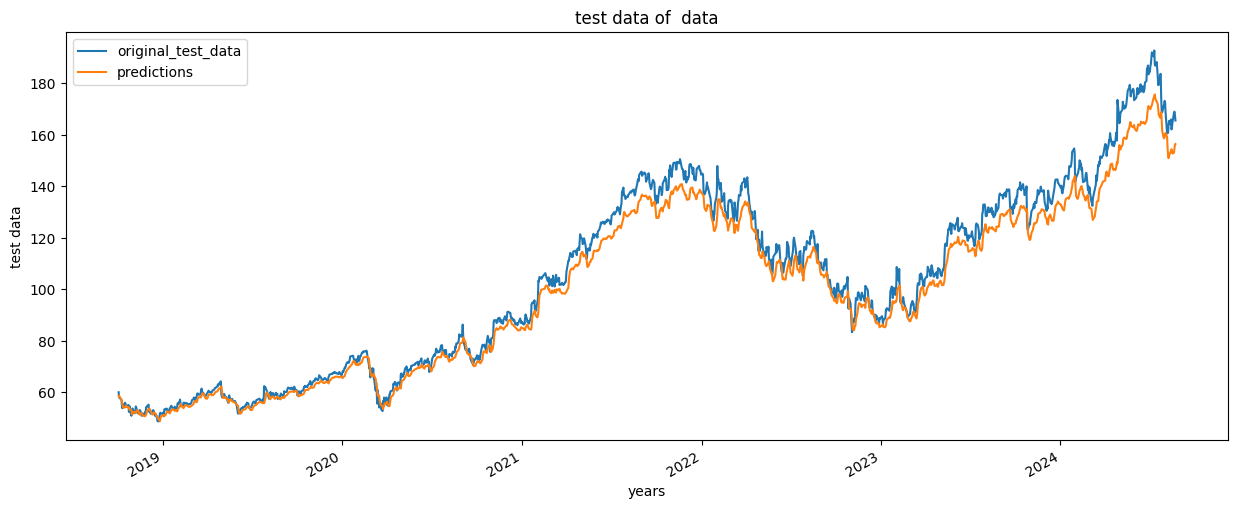

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

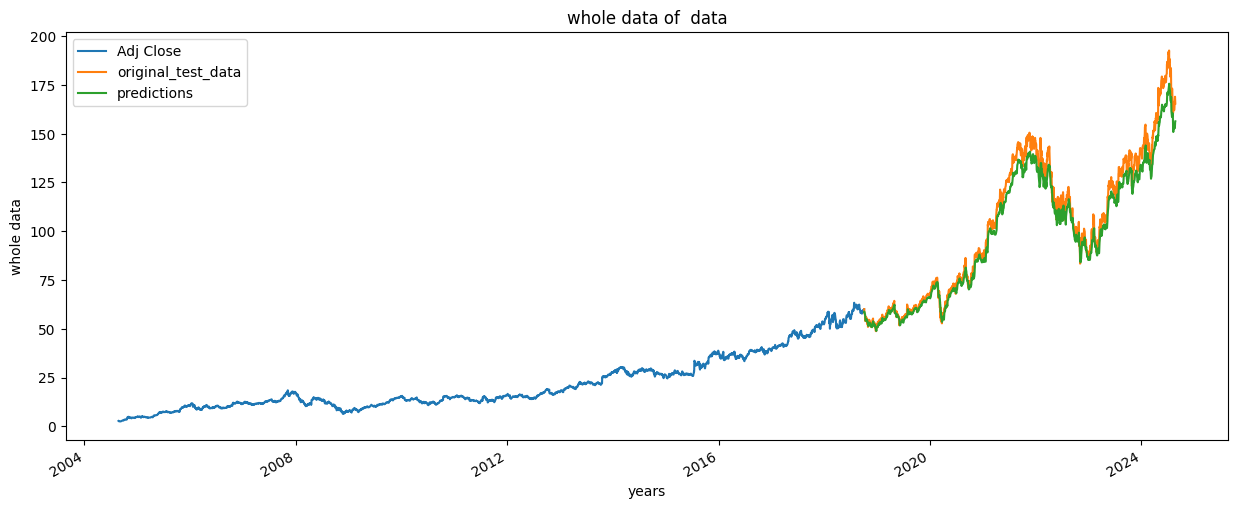

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")